In [10]:
from qiskit import IBMQ
IBMQ.save_account('07d68fb64871aeee5764a2621d504c9fa5a3bff77a7b2f8678e0d8e1e1631f40e13375e4d263b7b5072b826156295a6b9b0d2ed98de6b08e99ae25a00fd77f84', overwrite=True)
IBMQ.load_account()

C:\Users\Shikhar\anaconda3\lib\site-packages\qiskit\providers\ibmq\ibmqfactory.py:192: UserWarning: Timestamps in IBMQ backend properties, jobs, and job results are all now in local time instead of UTC.
  warnings.warn('Timestamps in IBMQ backend properties, jobs, and job results '


<AccountProvider for IBMQ(hub='ibm-q', group='open', project='main')>

In [16]:
provider= IBMQ.get_provider("ibm-q")
for backend in provider.backends():
    try:
        qubit_count=len(backend.properties().qubits)
    except:
        qubit_count="simulated"
    print(f"{backend.name()} has {backend.status().pending_jobs} queued and {qubit_count} qubits")    

ibmq_qasm_simulator has 2 queued and simulated qubits
ibmqx2 has 27 queued and 5 qubits
ibmq_16_melbourne has 19 queued and 15 qubits
ibmq_vigo has 30 queued and 5 qubits
ibmq_ourense has 57 queued and 5 qubits
ibmq_valencia has 7 queued and 5 qubits
ibmq_armonk has 5 queued and 1 qubits
ibmq_athens has 15 queued and 5 qubits
ibmq_santiago has 19 queued and 5 qubits


In [17]:
from qiskit.tools.monitor import job_monitor

backend= provider.get_backend("ibmq_valencia")

In [18]:
import qiskit as q
circuit=q.QuantumCircuit(2,2)
circuit.x(0)
circuit.cx(0,1)
circuit.measure([0,1],[0,1])
circuit.draw()

┌───┐     ┌─┐   
q_0: ┤ X ├──■──┤M├───
     └───┘┌─┴─┐└╥┘┌─┐
q_1: ─────┤ X ├─╫─┤M├
          └───┘ ║ └╥┘
c: 2/═══════════╩══╩═
                0  1

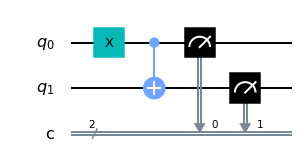

In [19]:
circuit.draw(output='mpl')

In [20]:
job=q.execute(circuit,backend=backend,shots=500)
job_monitor(job)

Job Status: job has successfully run


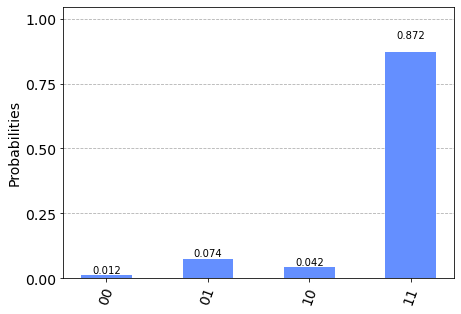

In [21]:
from qiskit.visualization import plot_histogram
from matplotlib import style
result=job.result()
counts=result.get_counts(circuit)
plot_histogram([counts])